In [362]:

# IMPORTING LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [202]:

# IMPORTING DATASET

df=pd.read_csv(r"D:\Priyal\From College\CODING\Python ML Project\Forest_fires_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [204]:

# EXPLORATORY DATA ANALYSIS


In [206]:
#checking for null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [210]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


In [212]:
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [214]:
df.Classes.unique().sum()

'not firefire'

In [216]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Heatmap')

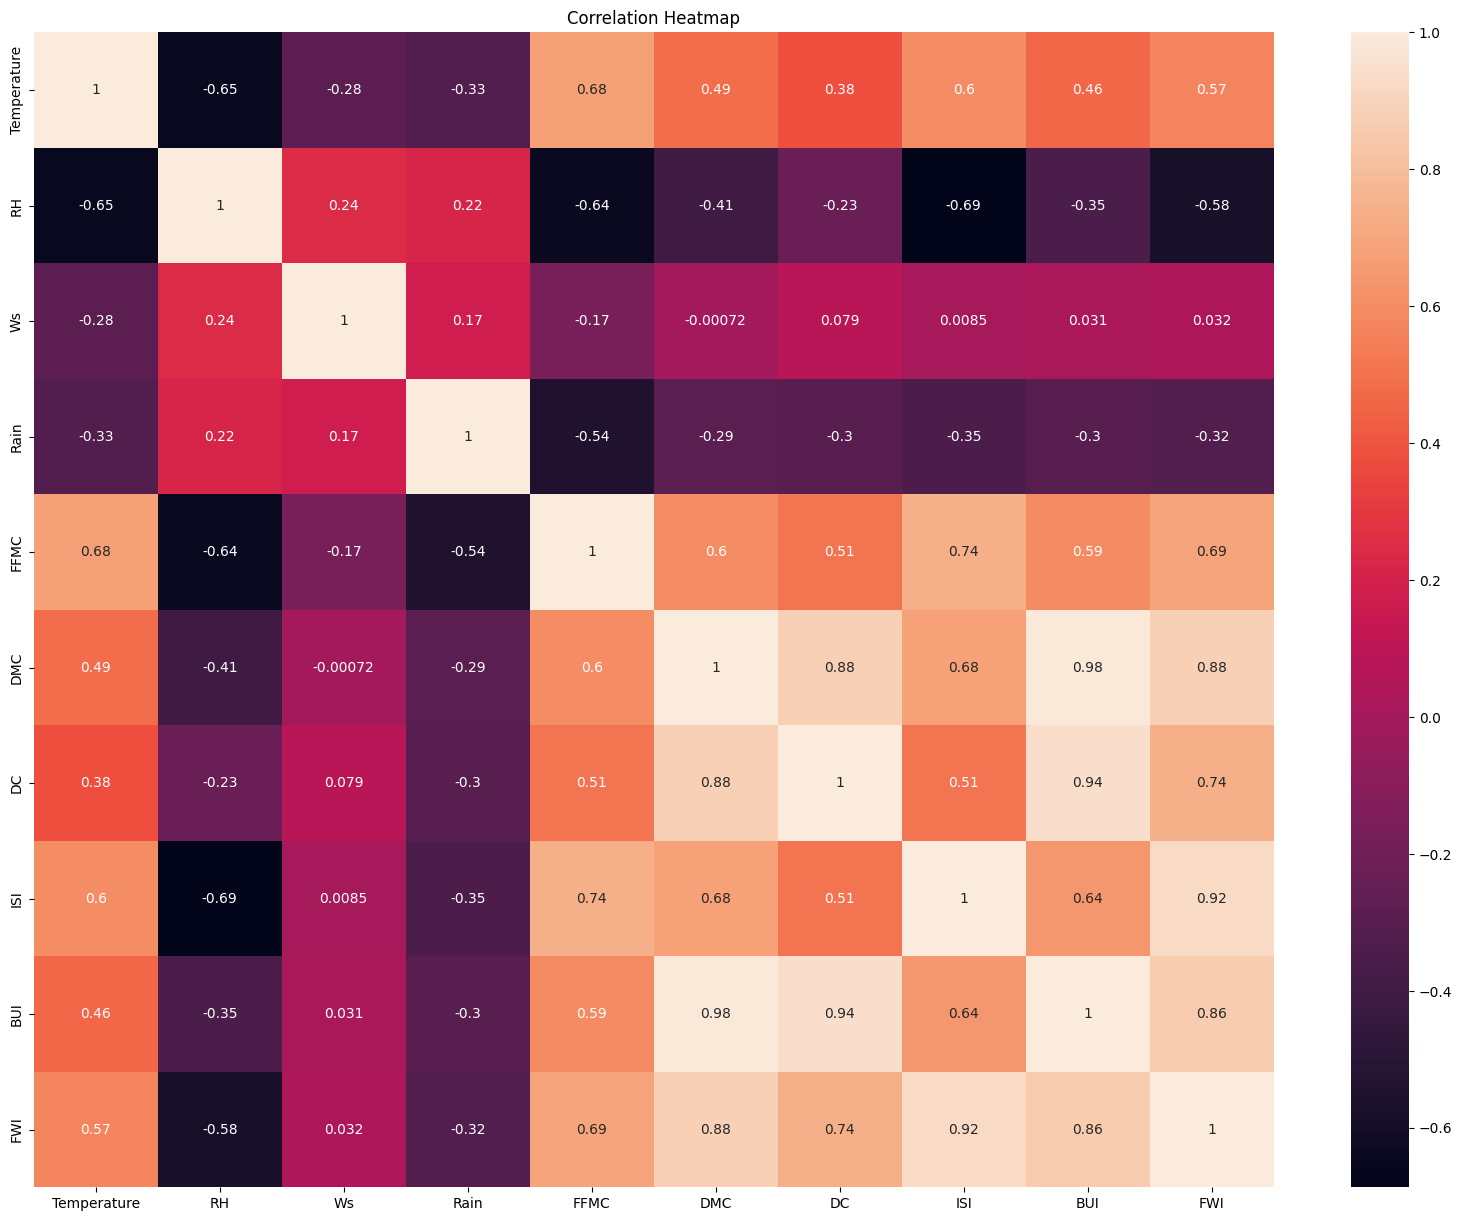

In [218]:
%matplotlib inline

corr = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']].corr()

#Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')

In [220]:

# DATA PREPROCESSING


In [222]:
df['Relative Humidity in %']=df.RH
df['Wind speed in km/h']=df.Ws
df['Forest Fire Occurred']=df.Classes
df=df.drop(['RH','Ws','Classes'],axis=1)
df.head()

,day,month,year,Temperature,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Relative Humidity in %,Wind speed in km/h,Forest Fire Occurred
0,1,6,2012,29,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,57,18,not fire
1,2,6,2012,29,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,61,13,not fire
2,3,6,2012,26,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,82,22,not fire
3,4,6,2012,25,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,89,13,not fire
4,5,6,2012,27,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,77,16,not fire


In [224]:
df=df.drop(['day','month','year','Region'],axis=1)
df.head()

,Temperature,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Relative Humidity in %,Wind speed in km/h,Forest Fire Occurred
0,29,0.0,65.7,3.4,7.6,1.3,3.4,0.5,57,18,not fire
1,29,1.3,64.4,4.1,7.6,1.0,3.9,0.4,61,13,not fire
2,26,13.1,47.1,2.5,7.1,0.3,2.7,0.1,82,22,not fire
3,25,2.5,28.6,1.3,6.9,0.0,1.7,0.0,89,13,not fire
4,27,0.0,64.8,3.0,14.2,1.2,3.9,0.5,77,16,not fire


In [230]:
#converting categorical data to numerical form
le=LabelEncoder()
df['Forest Fire Occurred']=le.fit_transform(df['Forest Fire Occurred'])
df.head()

,Temperature,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Relative Humidity in %,Wind speed in km/h,Forest Fire Occurred
0,29,0.0,65.7,3.4,7.6,1.3,3.4,0.5,57,18,1
1,29,1.3,64.4,4.1,7.6,1.0,3.9,0.4,61,13,1
2,26,13.1,47.1,2.5,7.1,0.3,2.7,0.1,82,22,1
3,25,2.5,28.6,1.3,6.9,0.0,1.7,0.0,89,13,1
4,27,0.0,64.8,3.0,14.2,1.2,3.9,0.5,77,16,1


In [232]:
#Input
X=df.drop(['Forest Fire Occurred'],axis='columns')
X.head()

,Temperature,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Relative Humidity in %,Wind speed in km/h
0,29,0.0,65.7,3.4,7.6,1.3,3.4,0.5,57,18
1,29,1.3,64.4,4.1,7.6,1.0,3.9,0.4,61,13
2,26,13.1,47.1,2.5,7.1,0.3,2.7,0.1,82,22
3,25,2.5,28.6,1.3,6.9,0.0,1.7,0.0,89,13
4,27,0.0,64.8,3.0,14.2,1.2,3.9,0.5,77,16


In [234]:
#Target
y=df['Forest Fire Occurred']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Forest Fire Occurred, dtype: int32

In [236]:
#Standardizing input
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [238]:
#Applying PCA
pca=PCA(0.95)
X=pca.fit_transform(X)

#pca gives numpy array so converting it back to df
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5
0,-2.048061,-0.145619,0.243349,-1.058268,0.164232,0.699271
1,-2.207526,-0.807806,-0.229999,0.527216,0.589829,0.334427
2,-4.716158,3.269965,4.253647,2.228598,-0.403700,-0.059166
3,-4.306025,0.938032,-0.702527,1.309184,1.253820,-1.086938
4,-2.542470,0.272066,-0.731763,-0.636334,0.566290,-0.019061


In [240]:
#splitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [242]:
X_train.head()

,0,1,2,3,4,5
0,-2.048061,-0.145619,0.243349,-1.058268,0.164232,0.699271
154,-0.096083,-0.684755,0.397750,-0.858511,-0.524486,0.193519
164,0.419054,-2.269456,0.456319,0.341825,-1.077218,0.023645
110,0.431857,-0.565015,-0.091077,-0.406257,1.245382,0.147380
224,-0.838015,-0.622314,-0.696649,-0.304023,0.158594,-0.211369


In [244]:
X_test.head()

,0,1,2,3,4,5
67,0.285268,0.101311,-0.328025,-0.521696,-0.022283,-0.213749
242,-2.427086,0.054274,-0.577739,-0.418390,1.437217,0.843443
205,5.605304,1.261631,0.230770,0.936461,0.769215,0.191502
122,-2.370543,-1.015386,-0.755175,0.740353,-0.034971,-0.525742
89,6.445009,3.098107,-0.035508,0.758152,0.233067,0.150000


In [248]:
y_train.head()

0      1
154    0
164    0
110    0
224    0
Name: Forest Fire Occurred, dtype: int32

In [250]:
y_test.head()

67     0
242    1
205    0
122    1
89     0
Name: Forest Fire Occurred, dtype: int32

In [252]:

# MODEL SEELCTION


In [336]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [338]:
lr.score(X_test,y_test)

0.9795918367346939

In [264]:
rfc=RandomForestClassifier(random_state=1)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [266]:
rfc.score(X_test,y_test)

0.9387755102040817

In [268]:
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [270]:
svc.score(X_test,y_test)

0.9591836734693877

In [276]:
gbm_clf=GradientBoostingClassifier()
gbm_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [278]:
gbm_clf.score(X_test,y_test)

0.9183673469387755

In [284]:
#Performance Evaluation

In [378]:
models={
    'Logistic Regression': lr,
    'Random Forest Classifier': rfc,
    'Support Vector Classifier': svc,
    'Gradient Boosting Classifier': gbm_clf
}

scores=[]

for name, model in models.items():
    model.fit(X_train,y_train)
    scores.append({
        'model': name,
        'accuracy': model.score(X_test,y_test)
    })

In [380]:
df=pd.DataFrame(scores)
df

,model,accuracy
0,Logistic Regression,0.979592
1,Random Forest Classifier,0.938776
2,Support Vector Classifier,0.959184
3,Gradient Boosting Classifier,0.918367


In [382]:
#Visualization

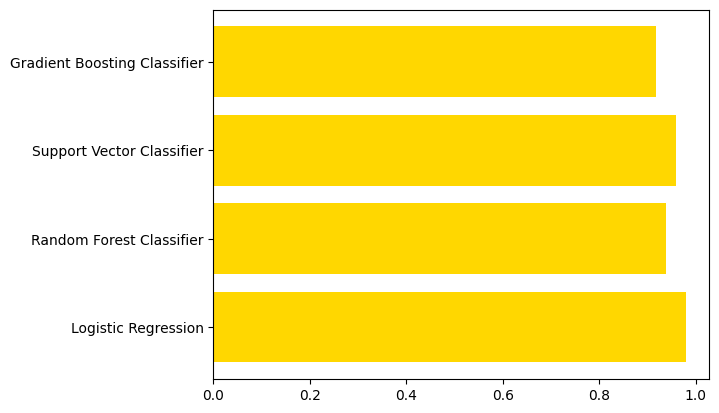

In [384]:
%matplotlib inline
plt.barh(df.model,df.accuracy,color='gold')
plt.show()

Text(70.72222222222221, 0.5, 'Truth')

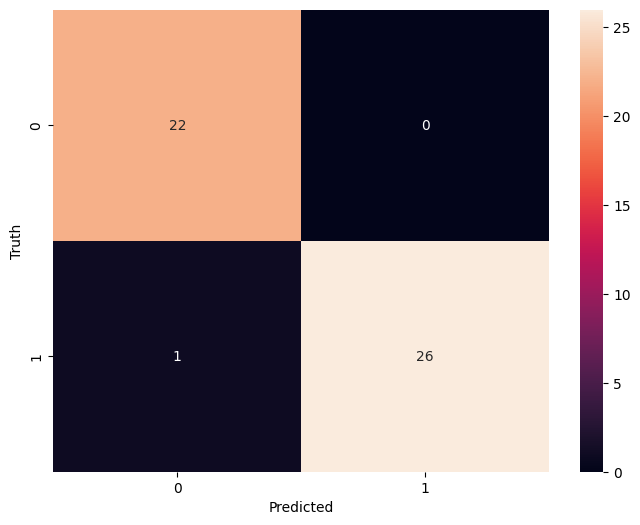

In [376]:
#Confusion matrix

y_pred=lr.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')